# Introduction to scikit-learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-learn

What we cover:

0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on the data
4. Evaluate a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis = 1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  # 80% data will be used as test

In [6]:
clf.fit(X_train, y_train);

In [7]:
# Make a predistion
y_label = clf.predict(np.array([0, 2, 3, 4]))

C:\Users\ankit\Documents\sample_projects\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3


In [9]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [10]:
y_test

231    0
297    0
200    0
76     1
270    0
      ..
37     1
289    0
183    0
187    0
244    0
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model on trainiing data and test data
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.7868852459016393

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.67      0.73        27
           1       0.77      0.88      0.82        34

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



In [14]:
confusion_matrix(y_test, y_preds)  

array([[18,  9],
       [ 4, 30]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [16]:
# 5. Improve a model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying a model with {i} estimators")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")

Trying a model with 10 estimators
Model accuracy on test set: 77.05%
Trying a model with 20 estimators
Model accuracy on test set: 78.69%
Trying a model with 30 estimators
Model accuracy on test set: 80.33%
Trying a model with 40 estimators
Model accuracy on test set: 80.33%
Trying a model with 50 estimators
Model accuracy on test set: 77.05%
Trying a model with 60 estimators
Model accuracy on test set: 81.97%
Trying a model with 70 estimators
Model accuracy on test set: 77.05%
Trying a model with 80 estimators
Model accuracy on test set: 81.97%
Trying a model with 90 estimators
Model accuracy on test set: 81.97%


In [17]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

In [19]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\ankit\Documents\sample_projects\env\python.exe
   machine: Windows-10-10.0.19043-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 61.2.0
      sklearn: 1.0.2
        numpy: 1.22.3
        scipy: 1.7.3
       Cython: None
       pandas: 1.4.2
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


C:\Users\ankit\Documents\sample_projects\env\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## 1. Getting our data ready to be used with machine learning

       Three main things we have to do:
        1. Split the data into features and labels (usually `X` and `y`)
        2. Filling (also called imputing) or disregarding missing values
        3. Converting non-numerical values to numerical values (also called feature encoding
        

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop("target", axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
X.shape

(303, 13)

In [26]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [27]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
len(car_sales)

1000

In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [30]:
# Split the data into `X` and `y`
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")
transformed_x = transformer.fit_transform(X)
transformed_x

In [ ]:
pd.DataFrame(transformed_x)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# Let's re-fit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size = 0.2)
model.fit(X_train, y_train);

In [ ]:
model.score(X_test, y_test)

### 1.2 What if there were missing values?
    1. Fill them with some value (also known as imputation)
    2. Remove the samples with missing data altogether.

In [32]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# Create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [35]:
# Let's try and convert data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")
transformed_x = transformer.fit_transform(X)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [36]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill missing data with Pandas

In [37]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace = True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the "Odometer (KM)" coloumn
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace = True)

In [38]:
# Check out dataframe
car_sales_missing.isnull().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [39]:
# Remove rows with missing "Price" value
car_sales_missing.dropna(inplace = True)

In [40]:
car_sales_missing.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
len(car_sales_missing)

950

In [42]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [43]:
# Let's try and convert data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fil missing values with Scikit-Learn

In [44]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
car_sales_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# Drop the rows with no labels.
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isnull().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
# Split into X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [48]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with 'mean'
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create and imputer (something that fills missing values)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [49]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [50]:
car_sales_filled.isnull().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
# Let's try and convert data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [52]:
# Now we have got our data an numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for our problem

    Scikit-learn uses estimator as another term for machine learning model or algorithm
    
        * Classification - predicting wheather a sample is one thing or another
        * Regression - predicting a number
        
    Step 1 - Check Scikit-learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for regression problem

In [53]:
# Import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

C:\Users\ankit\Documents\sample_projects\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [54]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
 # How many samples ?
len(boston_df)

506

In [56]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of Ridge model on test data
model.score(X_test, y_test)

0.6662221670168519

How do we improve the score?

What if Ridge wsn't working?

Let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [57]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

# Instantiate the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Check the score of Random Forest Regressor model on test data
rf.score(X_test, y_test)

0.8654448653350507

In [58]:
# Check the Ridge model again
model.score(X_test, y_test)

0.6662221670168519

### 2.2 Choosing an estimator for a classification problem
Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [59]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
len(heart_disease)

303

Cunsulting the map and it says to try LinearSVC

In [61]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# SPlit data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=100000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\ankit\Documents\sample_projects\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

In [62]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [63]:
# Import the RandomForestCLassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# SPlit data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:
    
    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorith on our data nad use it to make predictions

### 3.1 Fitting the model to the data

In [64]:
# Import the RandomForestCLassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# SPlit data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [65]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [66]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

    2 ways to predict:
        1. predict()
        2. predict_proba()

In [67]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) # this doesn't work

C:\Users\ankit\Documents\sample_projects\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [68]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
# Compare predictions to truth labels to evaluate the moddel
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [71]:
clf.score(X_test,y_test)

0.8524590163934426

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions `predict_proba()`

In [73]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [74]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [75]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression model

In [76]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

# Instantiate the mdoel
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [77]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [78]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [79]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating Machine Learning Model

    Three ways to evaluate Scikit-Learn models/estinamtors
    1. Estimator `score` method
    2. The `scoring` parameter
    3. Problem-specific metric function

### 4.1 Evaluating a model with `score` method

In [80]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [81]:
clf.score(X_train, y_train)

1.0

In [82]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same for Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

# Instantiate the mdoel
model = RandomForestRegressor().fit(X_train, y_train)

In [84]:
model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using `scoring` parameter

In [85]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier().fit(X_train, y_train);

In [86]:
clf.score(X_test, y_test)

0.8524590163934426

In [87]:
cross_val_score(clf, X, y, cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [88]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 5))

# Compare the 2
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [89]:
# Scoring parameter set to none by default
cross_val_score(clf, X, y, cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation matrics
    1. Accuracy
    2. Area under ROC curve
    3. Confusion matrix
    4. Classification report

Accuracy

In [90]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [92]:
np.mean(cross_val_score)

0.8248087431693989

In [93]:
print(f"Heart Disease Classifier Cross-Validated Acuuracy: {np.mean(cross_val_score) * 100:.2f} %")

Heart Disease Classifier Cross-Validated Acuuracy: 82.48 %


**Area under the receiver operating chatasteristic curve (AUC/ROC)**
    
    * Area under curve (AUC)
    * ROC curve
    
ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false posotive rate (fpr)

    * True positive = model predits 1 when truth is 1
    * False positive = model predicts 1 when truth is 0
    * True negative = model predicts 0 when truth is 0
    * False negative = model predicts 0 when truth is 1

In [94]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [96]:
y_probs_positives = y_probs[:, 1]
y_probs_negatives = y_probs[:, 0]

In [97]:
y_probs_positives[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [98]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positives)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

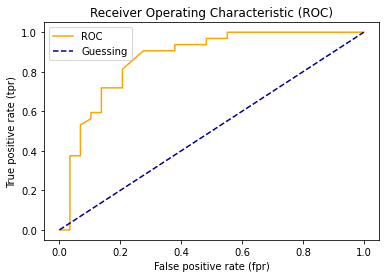

In [99]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [100]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positives)

0.8669181034482759

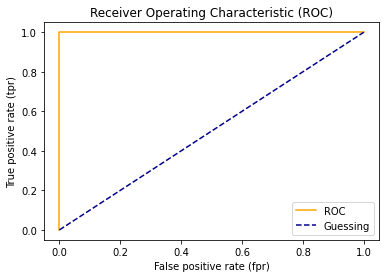

In [101]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [102]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

    A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused. 

In [103]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [104]:
# Visualize confusion metrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual Label"],
           colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [105]:
# How to install a conda package into the current environment from Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



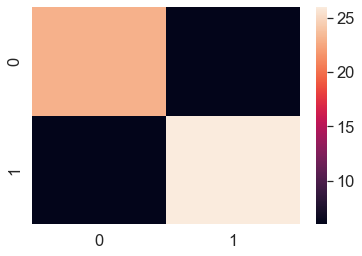

In [106]:
# Make our confusion matrix more visual with the help of Seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

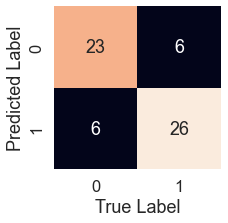

In [107]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(conf_mat,
                    annot = True,    # Annotate the boxes with conf_mat info
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    # Fix the broken annotations (this happend in Matplotlib 3.1.1)
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(conf_mat)

C:\Users\ankit\Documents\sample_projects\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


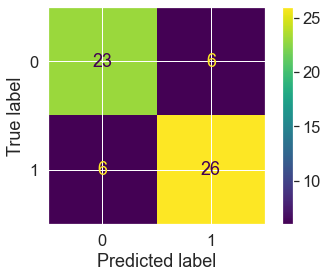

In [108]:
# Should not use this!
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test);

**Classification Report**

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [110]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1    # Only one positive case

disease_preds = np.zeros(10000)    # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True,
                                  zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summerize classification metrics:
    
    * Accuracy is a good measure to start with if all classes are balanced. (e.g. same amount of samples which are labelled with 0 or 1)
    * Precision and Recall become more important when classes are imbalanced.
    * If false positive are worse than false negative, aim for higher precison.
    * If false negative are worse than false positive, aim for higher recall.
    * F1-score is a combination of precision and recall.

### 4.2.2 Regression Model Evaluation Metrics

Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html

    1. R^2 (pronounced r-squared) or co-efficient of determination.
    2. Mean absolute error (MAE)
    3. Mean squared error (MSE)
    

**R^2**

What R-squared does: Compares ypur models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers , it's R^2 value would be 1.

In [113]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

In [114]:
model.score(X_test, y_test)

0.8654448653350507

In [117]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

y_test.mean()

21.488235294117654

In [119]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [120]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is teh average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your model's predictions are.

In [123]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [125]:
df = pd.DataFrame(data = {"actual values": y_test,
                         "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


** Mean Squared error**



In [126]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [129]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.867437068627439

### 4.23 Finally usung `scoring` parameter

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [131]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv= 5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [132]:
# Cross- validation accuracy
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [134]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv= 5, scoring = "accuracy")
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [135]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv= 5, scoring = "precision")
np.mean(cv_precision)

0.8085601538512754

In [136]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv= 5, scoring = "recall")
np.mean(cv_recall)

0.8424242424242424

In [137]:
# F1
cv_f1 = cross_val_score(clf, X, y, cv= 5, scoring = "f1")
np.mean(cv_f1)

0.841476533416832

How about a regression model ?

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

model = RandomForestRegressor()

In [141]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv= 5, scoring = None)
np.mean(cv_r2)

0.6243870737930857

In [140]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv= 5, scoring ="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [142]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv= 5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [144]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv= 5, scoring = "neg_mean_squared_error")
cv_mse.mean()

-21.729149843894373

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuaracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuaracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [150]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2 Score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2 Score: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## 5. Improving a model

First predictions = Baseline predictions.

First model = Baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better )
* Could we improve our data? 
    
From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters VS Parameters
* Parameters = Model finds these patterns in data
* Hyper-parameters = Settings on amodel you can adjust to (potenstially) improve it's ability to find patterns



Three ways to adjust hyperparameters:
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [151]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [152]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning of hyperparameters by hand

Lets's make 3 sets, training, validation and testing

In [154]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust following:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [166]:
def evaluation_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [167]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [168]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation, test
train_split = round(0.7 * len(heart_disease_shuffled))  # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))  # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline prediction
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluation_preds(y_valid, y_preds)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


### 5.2 Hyperparametr tuning with RandomizedSearchCV

In [185]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instantiate the model
# clf = RandomForestClassifier(n_jobs= 1)

# # Setup RandomizedSearchCV
# rs_clf = RandomizedSearchCV(estimator = clf,
#                            param_distributions = grid,
#                            n_iter = 10, # Number of models to try
#                            cv = 5,
#                            verbose = 2)

# # Fit the RandomizedSearchCV version of clf
# rs_clf.fit(X_train, y_train);

In [173]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [174]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluation_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [175]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [176]:
grid_2 = {'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [191]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instantiate the model
# clf = RandomForestClassifier(n_jobs= 1)

# # Setup GridSearchCV
# gs_clf = GridSearchCV(estimator = clf,
#                            param_grid= grid_2,
#                            cv = 5,
#                            verbose = 2)

# # Fit the GridSearchCV version of clf
# gs_clf.fit(X_train, y_train);

In [178]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [179]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluation_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


Let's compare our different models metrics.

<AxesSubplot:>

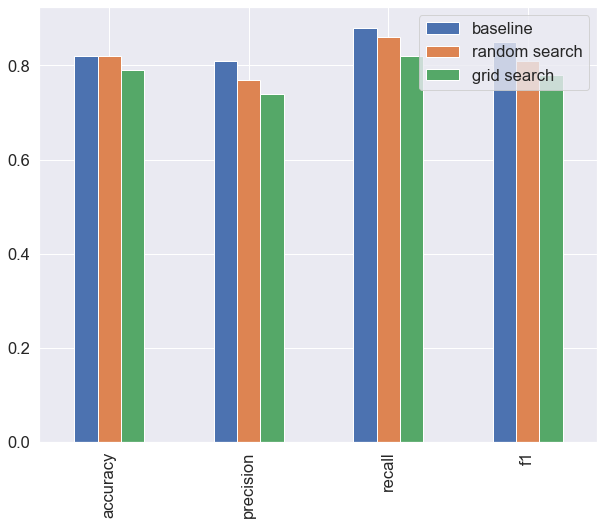

In [182]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading trained machine learning models

Two ways to save and lead machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [183]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [184]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [192]:
# Make predictions with loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluation_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [193]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [194]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [196]:
# Make and evaluate joblib prediction
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluation_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together!

In [197]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [199]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [201]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [203]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"], inplace = True)

# Define different features in transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numerica_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup pre-processing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers = [
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_feature),
    ("num", numerica_transformer, numeric_features)
])

# Create a preprocessing and modellng pipeline
model = Pipeline(steps =[
    ("preprocessr", preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis = 1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use GridSearchCv and RandomizedSearchCV with Pipeline

In [209]:
# # Use GridSearchCV with regression pipeline
# from sklearn.model_selection import GridSearchCV

# pipe_grid = {
#     "preprocessor__num__imputer__strategy": ["mean", "median"],
#     "model__n_estimators": [100, 1000],
#     "model__max_depth": [None, 5],
#     "model__max_features": ["auto"],
#     "model__min_sample_split": [2, 4]
# }

# gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
# gs_model.fit(X_train, y_train)